### PGPDSE Bangalore Nov 21 Project 

# Import the required Libraries

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import datetime as dt

from warnings import filterwarnings
filterwarnings('ignore')
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re
from pywaffle import Waffle
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px

# Reading the Data

In [2]:
orders=pd.read_csv('F:\\files\\Capstone data\\orders.csv')
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
customers=pd.read_csv('F:\\files\\Capstone data\\customers.csv')
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
orderitems=pd.read_csv('F:\\files\\Capstone data\\order_items.csv')
orderitems.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [7]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
orderpayments=pd.read_csv('F:\\files\\Capstone data\\order_payments.csv')
orderpayments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [9]:
orderpayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
products=pd.read_csv('F:\\files\\Capstone data\\products.csv')
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
sellers=pd.read_csv('F:\\files\\Capstone data\\sellers.csv')
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [13]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


# Merging the required dataset

In [14]:
len(orderitems['order_id'].unique())

98666

In [15]:
# orderitems have duplicate orders which are divided for each product id so for combining all we are doing a group by

In [16]:
orderitemsconsolidated=orderitems.groupby(by=['product_id','order_id'],as_index=False).agg({'order_item_id': 'count', 
        'seller_id': 'first',
        'shipping_limit_date': 'first',
        'price': 'first',
        'freight_value': 'first'})

In [17]:
len(orderitemsconsolidated['order_id'].unique())

98666

In [18]:
# So no data is lost after gropuing by the customers and their multiple orders

In [19]:
order_orderitems_merged=pd.merge(left=orders,right=orderitemsconsolidated,how='inner',on='order_id')

In [20]:
order_orderitems_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_approved_at              102411 non-null  object 
 5   order_delivered_carrier_date   101397 non-null  object 
 6   order_delivered_customer_date  100195 non-null  object 
 7   order_estimated_delivery_date  102425 non-null  object 
 8   product_id                     102425 non-null  object 
 9   order_item_id                  102425 non-null  int64  
 10  seller_id                      102425 non-null  object 
 11  shipping_limit_date            102425 non-null  object 
 12  price                         

In [21]:
order_orderitems_products_merged=pd.merge(left=order_orderitems_merged,right=products,how='inner',on='product_id')

In [22]:
order_orderitems_products_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_approved_at              102411 non-null  object 
 5   order_delivered_carrier_date   101397 non-null  object 
 6   order_delivered_customer_date  100195 non-null  object 
 7   order_estimated_delivery_date  102425 non-null  object 
 8   product_id                     102425 non-null  object 
 9   order_item_id                  102425 non-null  int64  
 10  seller_id                      102425 non-null  object 
 11  shipping_limit_date            102425 non-null  object 
 12  price                         

In [23]:
product_eng_name=pd.read_csv('F:\\files\\Capstone data\\product_category_name_translation.csv')
product_eng_name.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [24]:
product_dict=product_eng_name.to_dict(orient='list')

In [25]:
a=dict(zip(list(product_dict['product_category_name']),list(product_dict['product_category_name_english'])))

In [26]:
order_orderitems_products_merged['product_category_name'].value_counts()

cama_mesa_banho                  10160
beleza_saude                      9022
esporte_lazer                     7858
informatica_acessorios            6887
moveis_decoracao                  6781
                                 ...  
la_cuisine                          13
cds_dvds_musicais                   12
fashion_roupa_infanto_juvenil        8
pc_gamer                             8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

In [27]:
order_orderitems_products_merged['product_category_name'].replace(a,inplace=True)

In [28]:
order_orderitems_products_merged

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                  ...                               ...   
102420  87b4c933f31145a28413b39d880ad6c3  ddfdf5e9b2659e1fbd073404c9b762e0   
102421  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
102422  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
102423  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
102424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
2         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
3         delivered      2017-10-23 23:26:46  2017-10-25 02:14:11   
4         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
...             ...                      ...                  ...   
102420    delivered      2018-03-02 17:12:05  2018-03-02 17:49:24   
102421    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
102422    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
102423    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
102424    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-08-17 15:28:33           2017-08-18 14:44:43   
2               2017-08-04 17:35:43           2017-08-07 18:30:01   
3               2017-10-27 16:48:46           2017-11-07 18:04:59   
4               2018-07-26 14:31:00           2018-08-07 15:27:45   
...                             ...                           ...   
102420          2018-03-06 21:23:32           2018-03-16 17:21:55   
102421          2017-08-18 16:42:51           2017-08-23 15:36:29   
102422          2017-12-20 20:25:25           2018-01-26 15:45:14   
102423          2017-03-10 11:18:03           2017-03-17 15:08:01   
102424          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                        product_id  \
0                2017-10-18 00:00:00  87285b34884572647811a353c7ac498a   
1                2017-08-28 00:00:00  87285b34884572647811a353c7ac498a   
2                2017-08-15 00:00:00  87285b34884572647811a353c7ac498a   
3                2017-11-13 00:00:00  87285b34884572647811a353c7ac498a   
4                2018-08-13 00:00:00  595fac2a385ac33a80bd5114aec74eb8   
...                              ...                               ...   
102420           2018-03-21 00:00:00  cbaf5898b92064cd5e399c7cff291d0a   
102421           2017-08-31 00:00:00  0df37da38a30a713453b03053d60d3f7   
102422           2018-01-18 00:00:00  3d2c44374ee42b3003a470f3e937a2ea   
102423           2017-03-28 00:00:00  ac35486adb7b02598c182c2ff2e05254   
102424           2018-04-03 00:00:00  006619bbed68b000c8ba3f8725d5409e   

        order_item_id  ...   price freight_value  product_category_name  \
0                   1  ...   29.99          8.72             housewares   
1                   1  ...   29.99          7.78             housewares   
2                   1  ...   29.99          7.78             housewares   
3                   1  ...   29.99         14.10             housewares   
4                   1  ...  118.70         22.76              perfumery   
...               ...  ...     ...           ...                    ...   
102420              1  

In [29]:
order_orderitems_products_merged['product_category_name'].value_counts()

bed_bath_table               10160
health_beauty                 9022
sports_leisure                7858
computers_accessories         6887
furniture_decor               6781
                             ...  
la_cuisine                      13
cds_dvds_musicals               12
fashion_childrens_clothes        8
pc_gamer                         8
security_and_services            2
Name: product_category_name, Length: 73, dtype: int64

# Handling Missing Values

In [30]:
(order_orderitems_products_merged.isna().sum()/len(order_orderitems_products_merged))*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.013669
order_delivered_carrier_date     1.003661
order_delivered_customer_date    2.177203
order_estimated_delivery_date    0.000000
product_id                       0.000000
order_item_id                    0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name            1.425433
product_name_lenght              1.425433
product_description_lenght       1.425433
product_photos_qty               1.425433
product_weight_g                 0.015621
product_length_cm                0.015621
product_height_cm                0.015621
product_width_cm                 0.015621
dtype: float64

In [31]:
order_orderitems_products_merged.drop(['product_name_lenght','product_description_lenght','product_photos_qty'
                                      ,'product_weight_g','product_length_cm','product_height_cm','product_width_cm'],axis=1,inplace=True)

In [32]:
order_orderitems_products_merged

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                  ...                               ...   
102420  87b4c933f31145a28413b39d880ad6c3  ddfdf5e9b2659e1fbd073404c9b762e0   
102421  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
102422  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
102423  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
102424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
2         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
3         delivered      2017-10-23 23:26:46  2017-10-25 02:14:11   
4         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
...             ...                      ...                  ...   
102420    delivered      2018-03-02 17:12:05  2018-03-02 17:49:24   
102421    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
102422    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
102423    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
102424    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-08-17 15:28:33           2017-08-18 14:44:43   
2               2017-08-04 17:35:43           2017-08-07 18:30:01   
3               2017-10-27 16:48:46           2017-11-07 18:04:59   
4               2018-07-26 14:31:00           2018-08-07 15:27:45   
...                             ...                           ...   
102420          2018-03-06 21:23:32           2018-03-16 17:21:55   
102421          2017-08-18 16:42:51           2017-08-23 15:36:29   
102422          2017-12-20 20:25:25           2018-01-26 15:45:14   
102423          2017-03-10 11:18:03           2017-03-17 15:08:01   
102424          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                        product_id  \
0                2017-10-18 00:00:00  87285b34884572647811a353c7ac498a   
1                2017-08-28 00:00:00  87285b34884572647811a353c7ac498a   
2                2017-08-15 00:00:00  87285b34884572647811a353c7ac498a   
3                2017-11-13 00:00:00  87285b34884572647811a353c7ac498a   
4                2018-08-13 00:00:00  595fac2a385ac33a80bd5114aec74eb8   
...                              ...                               ...   
102420           2018-03-21 00:00:00  cbaf5898b92064cd5e399c7cff291d0a   
102421           2017-08-31 00:00:00  0df37da38a30a713453b03053d60d3f7   
102422           2018-01-18 00:00:00  3d2c44374ee42b3003a470f3e937a2ea   
102423           2017-03-28 00:00:00  ac35486adb7b02598c182c2ff2e05254   
102424           2018-04-03 00:00:00  006619bbed68b000c8ba3f8725d5409e   

        order_item_id                         seller_id  shipping_limit_date  \
0                   1  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   
1                   1  3504c0cb71d7fa48d967e0e4c94d59d9  2017-08-21 20:05:16   
2                   1  3504c0cb71d7fa48d967e0e4c94d59d9  2017-08-08 18:37:31   
3                   1  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-31 02:14:11   
4                   1  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27   
...               ...                               ...             

In [33]:
order_orderitems_products_merged.isna().sum()/len(order_orderitems_products_merged)*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.013669
order_delivered_carrier_date     1.003661
order_delivered_customer_date    2.177203
order_estimated_delivery_date    0.000000
product_id                       0.000000
order_item_id                    0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name            1.425433
dtype: float64

In [34]:
order_orderitems_products_merged['order_approved_at'].value_counts()

2018-02-27 04:31:10    9
2018-08-09 14:26:11    8
2018-08-12 02:25:07    8
2018-02-06 05:31:52    8
2017-12-01 11:31:59    8
                      ..
2018-02-22 10:34:28    1
2017-12-09 00:31:03    1
2017-12-18 22:14:29    1
2018-02-15 04:10:46    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90174, dtype: int64

In [35]:
order_orderitems_products_merged['order_approved_at'].fillna(method='ffill',inplace=True)

In [36]:
order_orderitems_products_merged['order_delivered_carrier_date'].value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-17 15:06:00    18
2018-08-15 12:53:00    18
                       ..
2018-01-03 17:15:11     1
2017-12-13 13:26:52     1
2018-02-06 14:54:43     1
2018-04-07 01:18:36     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 81017, dtype: int64

In [37]:
order_orderitems_products_merged['order_delivered_carrier_date'].fillna(method='ffill',inplace=True)

In [38]:
order_orderitems_products_merged['order_delivered_customer_date'].fillna(method='ffill',inplace=True)

In [39]:
order_orderitems_products_merged.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
product_id                          0
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1460
dtype: int64

# Changing the Data types

In [40]:
order_orderitems_products_merged['order_purchase_timestamp']=pd.to_datetime(order_orderitems_products_merged['order_purchase_timestamp'],format='%Y-%m-%d  %H:%M:%S')

In [41]:
order_orderitems_products_merged['order_delivered_carrier_date']=pd.to_datetime(order_orderitems_products_merged['order_delivered_carrier_date'],format='%Y-%m-%d  %H:%M:%S')

In [42]:
order_orderitems_products_merged['order_delivered_customer_date']=pd.to_datetime(order_orderitems_products_merged['order_delivered_customer_date'],
                                                                                 format='%Y-%m-%d  %H:%M:%S')

In [43]:
order_orderitems_products_merged['order_estimated_delivery_date']=pd.to_datetime(order_orderitems_products_merged['order_estimated_delivery_date'],
                                                                                 format='%Y-%m-%d  %H:%M:%S')

In [44]:
order_orderitems_products_merged.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
order_item_id                             int64
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
dtype: object

In [45]:
order_orderitems_products_merged['order_purchase_Date']=order_orderitems_products_merged['order_purchase_timestamp'].dt.date

In [46]:
order_orderitems_products_merged['order_delivered_carrier_date']=order_orderitems_products_merged['order_delivered_carrier_date'].dt.date

In [47]:
order_orderitems_products_merged['order_delivered_customer_date']=order_orderitems_products_merged['order_delivered_customer_date'].dt.date

In [48]:
order_orderitems_products_merged['order_estimated_delivery_date']=order_orderitems_products_merged['order_estimated_delivery_date'].dt.date

In [49]:
order_orderitems_products_merged.drop(['order_approved_at','shipping_limit_date'],axis=1,inplace=True)

In [50]:
order_orderitems_products_merged.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp order_delivered_carrier_date  \
0    delivered      2017-10-02 10:56:33                   2017-10-04   
1    delivered      2017-08-15 18:29:31                   2017-08-17   
2    delivered      2017-08-02 18:24:47                   2017-08-04   
3    delivered      2017-10-23 23:26:46                   2017-10-27   
4    delivered      2018-07-24 20:41:37                   2018-07-26   

  order_delivered_customer_date order_estimated_delivery_date  \
0                    2017-10-10                    2017-10-18   
1                    2017-08-18                    2017-08-28   
2                    2017-08-07                    2017-08-15   
3                    2017-11-07                    2017-11-13   
4                    2018-08-07                    2018-08-13   

                         product_id  order_item_id  \
0  87285b34884572647811a353c7ac498a              1   
1  87285b34884572647811a353c7ac498a              1   
2  87285b34884572647811a353c7ac498a              1   
3  87285b34884572647811a353c7ac498a              1   
4  595fac2a385ac33a80bd5114aec74eb8              1   

                          seller_id   price  freight_value  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   29.99           8.72   
1  3504c0cb71d7fa48d967e0e4c94d59d9   29.99           7.78   
2  3504c0cb71d7fa48d967e0e4c94d59d9   29.99           7.78   
3  3504c0cb71d7fa48d967e0e4c94d59d9   29.99          14.10   
4  289cdb325fb7e7f891c38608bf9e0962  118.70          22.76   

  product_category_name order_purchase_Date  
0            housewares          2017-10-02  
1            housewares          2017-08-15  
2            housewares          2017-08-02  
3            housewares          2017-10-23  
4             perfumery          2018-07-24

In [51]:
order_orderitems_products_merged.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
product_id                               object
order_item_id                             int64
seller_id                                object
price                                   float64
freight_value                           float64
product_category_name                    object
order_purchase_Date                      object
dtype: object

In [52]:
for i in ['order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_purchase_Date']:
      order_orderitems_products_merged[i]=pd.to_datetime(order_orderitems_products_merged[i],format='%Y-%m-%d')

In [53]:
order_orderitems_products_merged.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
order_item_id                             int64
seller_id                                object
price                                   float64
freight_value                           float64
product_category_name                    object
order_purchase_Date              datetime64[ns]
dtype: object

In [54]:
order_orderitems_products_merged_full=order_orderitems_products_merged.copy()

In [55]:
order_orderitems_products_merged=order_orderitems_products_merged[order_orderitems_products_merged['order_purchase_Date'].dt.year!=2016]

In [56]:
order_orderitems_products_customers_merged=pd.merge(left=order_orderitems_products_merged,right=customers,how='inner',on='customer_id')

In [57]:
order_orderitems_products_customers_merged_full=pd.merge(left=order_orderitems_products_merged_full,right=customers,how='inner',on='customer_id')

# UniVariate & BiVariate Analysis

In [58]:
price=order_orderitems_products_merged.groupby(by=order_orderitems_products_merged['order_purchase_Date'].dt.year)['price'].agg(['sum'])

In [59]:
price.reset_index(inplace=True)

In [60]:
price

order_purchase_Date         sum
0                 2017  5769410.72
1                 2018  6928048.98

<AxesSubplot:xlabel='order_purchase_Date', ylabel='sum'>

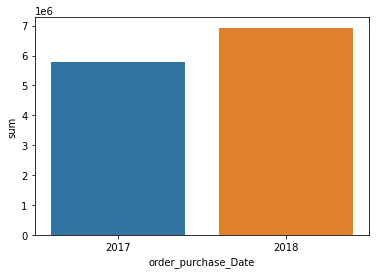

In [61]:
sns.barplot(x=price['order_purchase_Date'],y=price['sum'])

The revenue generated in 2017 is 5769410.72 brazillian reals whereas in 2018 for 8 months is 6928048.98 brazillian reals

In [62]:
a=pd.DataFrame(order_orderitems_products_merged['product_category_name'].value_counts()).reset_index()

In [63]:
a.rename(columns={'index':'Product Categories','product_category_name':'Sales'},inplace=True)

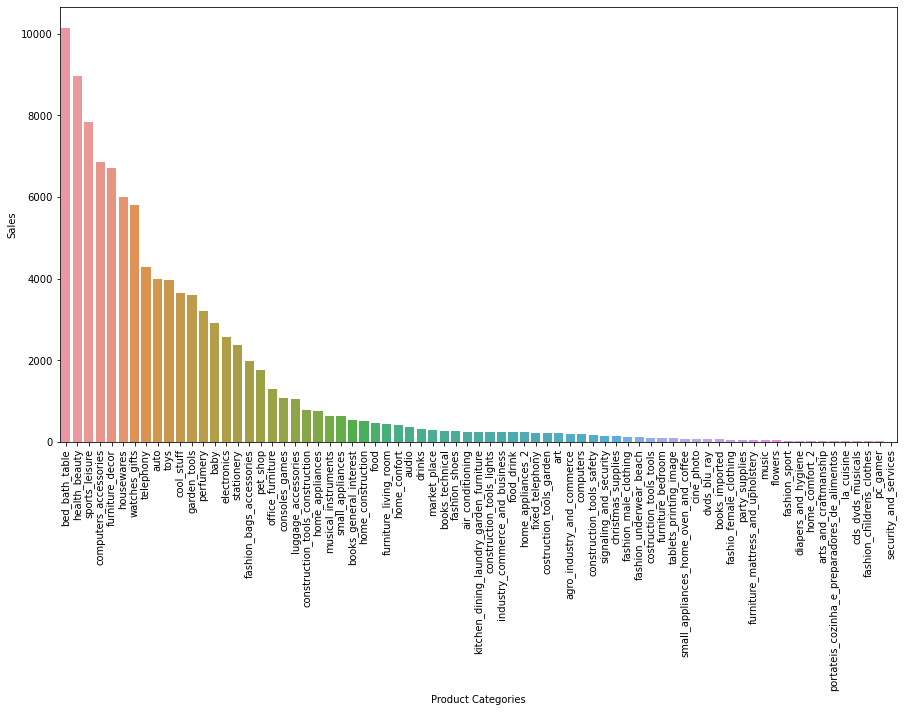

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(x=a['Product Categories'],y=a['Sales'])
plt.xticks(rotation='vertical')
plt.show()

From the above barplot, bed_bath_table product category has got most sales and security_and_services has the least sales.

In [65]:
prod_price=order_orderitems_products_merged.groupby(by=order_orderitems_products_merged['product_category_name'])['price'].agg(['sum']).reset_index()

In [66]:
prod_price.sort_values(by='sum',ascending=False,inplace=True)

In [67]:
prod_price.rename(columns={'sum':'revenue'},inplace=True)

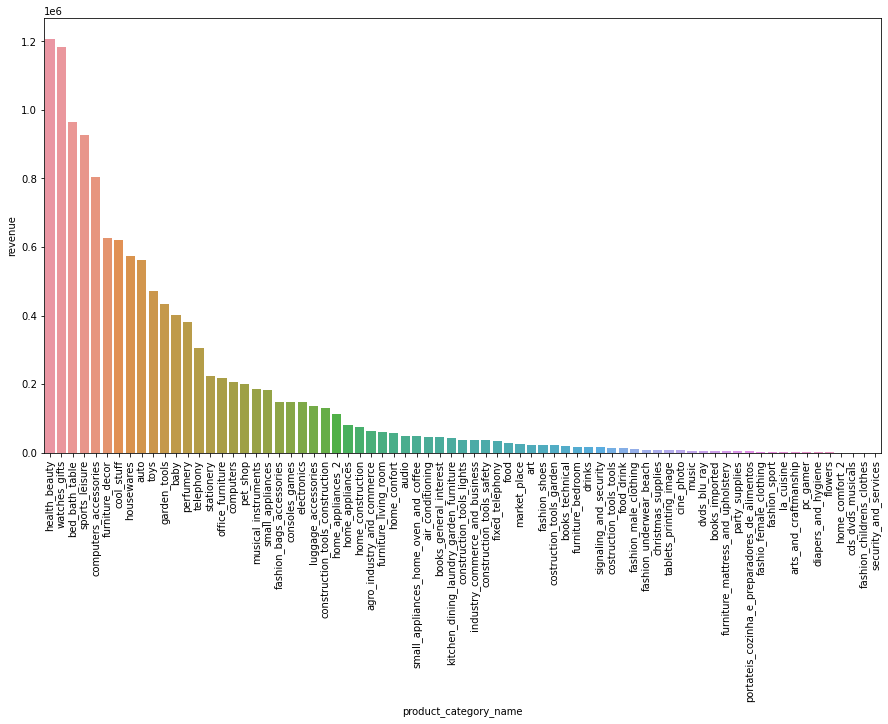

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x=prod_price['product_category_name'],y=prod_price['revenue'])
plt.xticks(rotation='vertical')
plt.show()

From the barplot, health_beauty category has produced the highest revenue and security_and_services has produced least revenue.

In [69]:
monthlysales_count=order_orderitems_products_merged.groupby(by=[order_orderitems_products_merged['order_purchase_Date'].dt.year,order_orderitems_products_merged['order_purchase_Date'].dt.month])['product_category_name'].agg(['count']).reset_index(level=1)

In [70]:
monthlysales_count.rename(columns={'order_purchase_Date':'purchase_month'},inplace=True)

In [71]:
monthlysales_count.reset_index(inplace=True)

In [72]:
monthlysales_count.rename(columns={'order_purchase_Date':'Year'},inplace=True)

<AxesSubplot:xlabel='purchase_month', ylabel='count'>

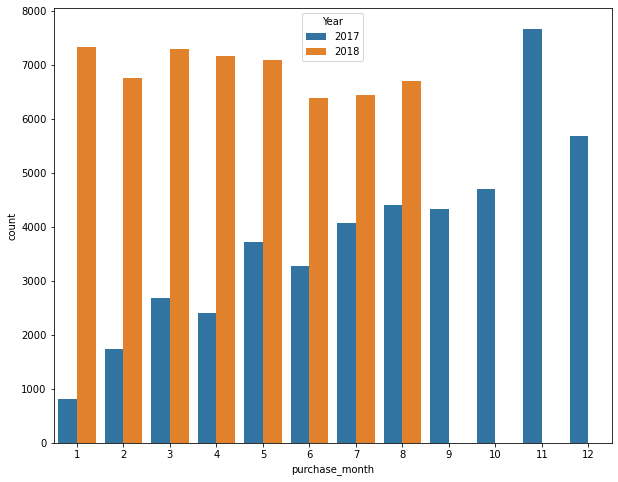

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x=monthlysales_count['purchase_month'],y=monthlysales_count['count'],hue=monthlysales_count['Year'])

From the Monthly Sales chart, Most Sales happened in  2017 November and least sales happened in 2017 January. 

In [74]:
order_orderitems_products_customers_merged.drop(['customer_city'],axis=1,inplace=True)

In [75]:
order_orderitems_products_customers_merged['estimated_no_of_days_delivered']=order_orderitems_products_customers_merged['order_estimated_delivery_date']-order_orderitems_products_customers_merged['order_purchase_Date']
    

In [76]:
order_orderitems_products_customers_merged['actual_no_of_days_delivered']=order_orderitems_products_customers_merged['order_delivered_customer_date']-order_orderitems_products_customers_merged['order_purchase_Date']

In [77]:
order_orderitems_products_customers_merged.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp order_delivered_carrier_date  \
0    delivered      2017-10-02 10:56:33                   2017-10-04   
1    delivered      2017-08-15 18:29:31                   2017-08-17   
2    delivered      2017-08-02 18:24:47                   2017-08-04   
3    delivered      2017-10-23 23:26:46                   2017-10-27   
4    delivered      2018-07-24 20:41:37                   2018-07-26   

  order_delivered_customer_date order_estimated_delivery_date  \
0                    2017-10-10                    2017-10-18   
1                    2017-08-18                    2017-08-28   
2                    2017-08-07                    2017-08-15   
3                    2017-11-07                    2017-11-13   
4                    2018-08-07                    2018-08-13   

                         product_id  order_item_id  \
0  87285b34884572647811a353c7ac498a              1   
1  87285b34884572647811a353c7ac498a              1   
2  87285b34884572647811a353c7ac498a              1   
3  87285b34884572647811a353c7ac498a              1   
4  595fac2a385ac33a80bd5114aec74eb8              1   

                          seller_id   price  freight_value  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   29.99           8.72   
1  3504c0cb71d7fa48d967e0e4c94d59d9   29.99           7.78   
2  3504c0cb71d7fa48d967e0e4c94d59d9   29.99           7.78   
3  3504c0cb71d7fa48d967e0e4c94d59d9   29.99          14.10   
4  289cdb325fb7e7f891c38608bf9e0962  118.70          22.76   

  product_category_name order_purchase_Date                customer_unique_id  \
0            housewares          2017-10-02  7c396fd4830fd04220f754e42b4e5bff   
1            housewares          2017-08-15  3a51803cc0d012c3b5dc8b7528cb05f7   
2            housewares          2017-08-02  ef0996a1a279c26e7ecbd737be23d235   
3            housewares          2017-10-23  e781fdcc107d13d865fc7698711cc572   
4             perfumery          2018-07-24  af07308b275d755c9edb36a90c618231   

   customer_zip_code_prefix customer_state estimated_no_of_days_delivered  \
0                      3149             SP                        16 days   
1                      3366             SP                        13 days   
2                      2290             SP                        13 days   
3                     88032             SC                        21 days   
4                     47813             BA                        20 days   

  actual_no_of_days_delivered  
0                      8 days  
1                      3 days  
2                      5 days  
3                     15 days  
4                     14 days

In [78]:
order_orderitems_products_customers_merged.dtypes

order_id                                   object
customer_id                                object
order_status                               object
order_purchase_timestamp           datetime64[ns]
order_delivered_carrier_date       datetime64[ns]
order_delivered_customer_date      datetime64[ns]
order_estimated_delivery_date      datetime64[ns]
product_id                                 object
order_item_id                               int64
seller_id                                  object
price                                     float64
freight_value                             float64
product_category_name                      object
order_purchase_Date                datetime64[ns]
customer_unique_id                         object
customer_zip_code_prefix                    int64
customer_state                             object
estimated_no_of_days_delivered    timedelta64[ns]
actual_no_of_days_delivered       timedelta64[ns]
dtype: object

In [79]:
order_orderitems_products_customers_merged['estimated_no_of_days_delivered']=order_orderitems_products_customers_merged['estimated_no_of_days_delivered'].dt.days
order_orderitems_products_customers_merged['actual_no_of_days_delivered']=order_orderitems_products_customers_merged['actual_no_of_days_delivered'].dt.days

In [80]:
order_orderitems_products_customers_merged

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                  ...                               ...   
102088  87b4c933f31145a28413b39d880ad6c3  ddfdf5e9b2659e1fbd073404c9b762e0   
102089  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
102090  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
102091  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
102092  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_delivered_carrier_date  \
0         delivered      2017-10-02 10:56:33                   2017-10-04   
1         delivered      2017-08-15 18:29:31                   2017-08-17   
2         delivered      2017-08-02 18:24:47                   2017-08-04   
3         delivered      2017-10-23 23:26:46                   2017-10-27   
4         delivered      2018-07-24 20:41:37                   2018-07-26   
...             ...                      ...                          ...   
102088    delivered      2018-03-02 17:12:05                   2018-03-06   
102089    delivered      2017-08-10 21:21:07                   2017-08-18   
102090    delivered      2017-12-20 09:52:41                   2017-12-20   
102091    delivered      2017-03-09 09:54:05                   2017-03-10   
102092    delivered      2018-03-08 20:57:30                   2018-03-09   

       order_delivered_customer_date order_estimated_delivery_date  \
0                         2017-10-10                    2017-10-18   
1                         2017-08-18                    2017-08-28   
2                         2017-08-07                    2017-08-15   
3                         2017-11-07                    2017-11-13   
4                         2018-08-07                    2018-08-13   
...                              ...                           ...   
102088                    2018-03-16                    2018-03-21   
102089                    2017-08-23                    2017-08-31   
102090                    2018-01-26                    2018-01-18   
102091                    2017-03-17                    2017-03-28   
102092                    2018-03-16                    2018-04-03   

                              product_id  order_item_id  \
0       87285b34884572647811a353c7ac498a              1   
1       87285b34884572647811a353c7ac498a              1   
2       87285b34884572647811a353c7ac498a              1   
3       87285b34884572647811a353c7ac498a              1   
4       595fac2a385ac33a80bd5114aec74eb8              1   
...                                  ...            ...   
102088  cbaf5898b92064cd5e399c7cff291d0a              1   
102089  0df37da38a30a713453b03053d60d3f7              2   
102090  3d2c44374ee42b3003a470f3e937a2ea              1   
102091  ac35486adb7b02598c182c2ff2e05254              1   
102092  006619bbed68b000c8ba3f8725d5409e              1   

                               seller_id   price  freight_value  \
0       3504c0cb71d7fa48d967e0e4c94d59d9   29.99           8.72   
1       3504c0cb71d7fa48d967e0e4c94d59d9   29.99           7.78   
2       3504c0cb71d7fa48d967e0e4c94d59d9   29.99           7.78   
3       3504c0cb71d7fa48d967e0e4c94d59d9   29.99          14.10   
4       289cdb325fb7e7f891c38608bf9e0962  118.70          22.76   
...                                  ...     ...            ...   
102088  06a2c3af7b3aee5d69171b0e14f0ee87   57.99          27.26   
102089  218d46b86c1881d022bce9c68a7d4b15  356.00          18.12   
102090  ce248b21c

In [81]:
order_orderitems_products_customers_merged=order_orderitems_products_customers_merged[order_orderitems_products_customers_merged['actual_no_of_days_delivered']>0]

In [82]:
state_meandeliverydays=order_orderitems_products_customers_merged[order_orderitems_products_customers_merged['order_status']=='delivered'].groupby(by='customer_state')['actual_no_of_days_delivered'].agg(['mean']).reset_index()

In [83]:
state_meandeliverydays.sort_values(by='mean',ascending=False,inplace=True)

Text(0.5, 1.0, 'Average Delivery time of each state')

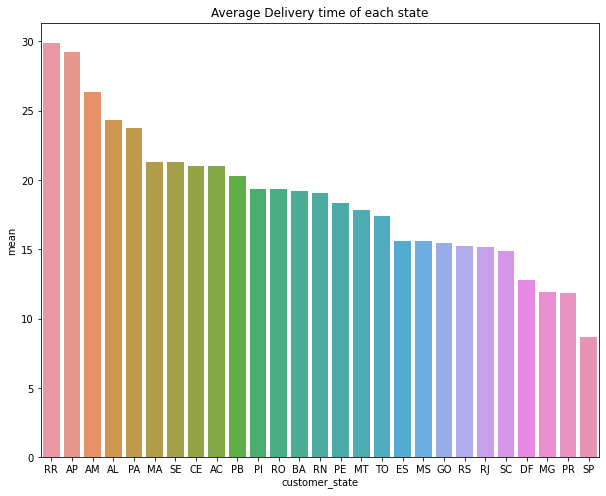

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x=state_meandeliverydays['customer_state'],y=state_meandeliverydays['mean'])
plt.title('Average Delivery time of each state')

From the Plot,We observe that for RR state average delivery time of any product category is more and for SP state average delivery time of any product category is less.

In [85]:
state_wisesales=order_orderitems_products_customers_merged[order_orderitems_products_customers_merged['order_status']=='delivered'].groupby(by='customer_state')['order_purchase_Date'].agg(['count'])

In [86]:
state_wisesales.reset_index(inplace=True)

In [87]:
state_wisesales=state_wisesales.sort_values(by='count',ascending=False).reset_index(drop=True)

<AxesSubplot:xlabel='customer_state', ylabel='count'>

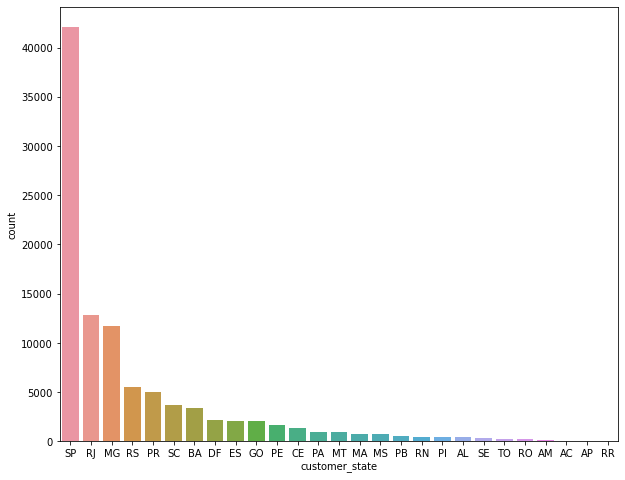

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(x=state_wisesales['customer_state'],y=state_wisesales['count'])

From the State wise Sales and Average Delivery Days, the state which has the least delivery time produces the highest sales whereas the state which has highest delivery time produces the least sales count.

In [89]:
min_max_deliveries=order_orderitems_products_customers_merged[order_orderitems_products_customers_merged['order_status']=='delivered'].groupby(by=['product_category_name'])['actual_no_of_days_delivered'].agg(['min','max'])

In [90]:
min_max_deliveries.reset_index(inplace=True)

In [91]:
min_max_deliveries.sort_values(by=['max','min'],ascending=False,inplace=True)

In [92]:
min_max_deliveries

product_category_name  min  max
67                                 sports_leisure    1  319
5                                            auto    1  210
20                                     cool_stuff    1  208
16                                 consoles_games    1  196
56                            musical_instruments    1  195
..                                            ...  ...  ...
63                          security_and_services   11   19
11                              cds_dvds_musicals    7   19
62  portateis_cozinha_e_preparadores_de_alimentos    3   19
59                                       pc_gamer    3   17
52                                     la_cuisine    5   14

[73 rows x 3 columns]

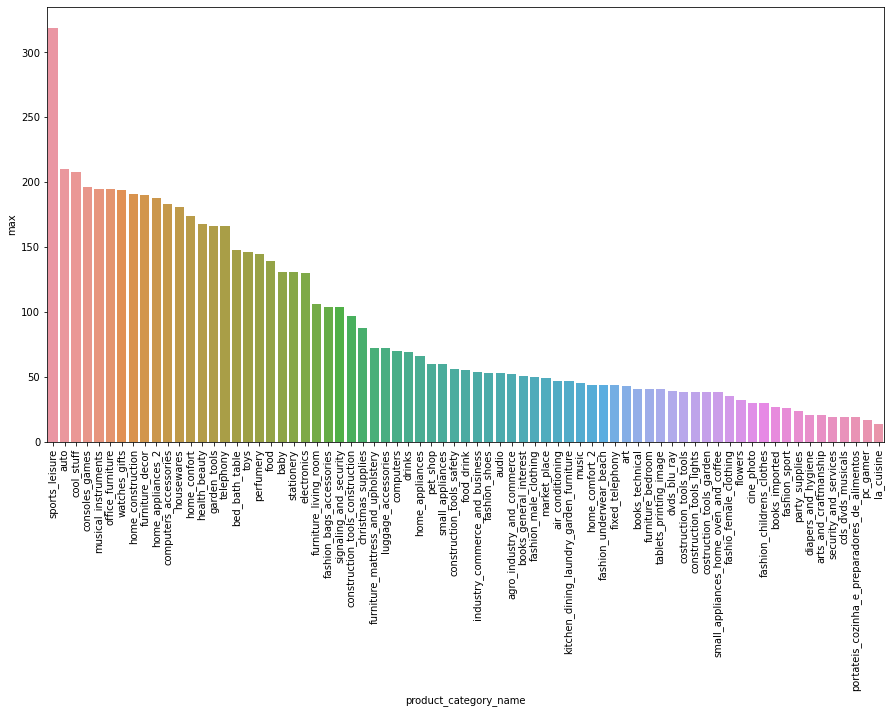

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(x=min_max_deliveries['product_category_name'],y=min_max_deliveries['max'])
plt.xticks(rotation='vertical')
plt.show()

From the Barplot,We observe that sports_leisure category has the highest max delivery time and la_cuisine has the least max delivery time.

In [94]:
orderpayments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [95]:
order_orderitems_products_customers_payments_merged=pd.merge(left=order_orderitems_products_customers_merged,right=orderpayments,how='inner',on='order_id')

In [96]:
a=pd.Series(order_orderitems_products_customers_payments_merged['payment_type'].value_counts())

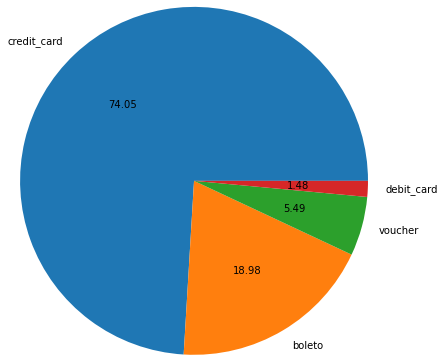

In [97]:
plt.figure(figsize=(10,4))
plt.pie(a,labels=a.index,autopct='%.2f',radius=2)
plt.show()

From the pie chart, it is observed that 73 percent of the transactions are done through credit card.

In [98]:
days_sales=pd.DataFrame(order_orderitems_products_customers_payments_merged['actual_no_of_days_delivered'].value_counts().iloc[0:30]).reset_index()

In [99]:
days_sales.rename(columns={'index':'Days for Delivery','actual_no_of_days_delivered':'Sales'},inplace=True)

In [100]:
days_sales.sort_values(by='Sales',ascending=False,inplace=True)

<AxesSubplot:xlabel='Days for Delivery', ylabel='Sales'>

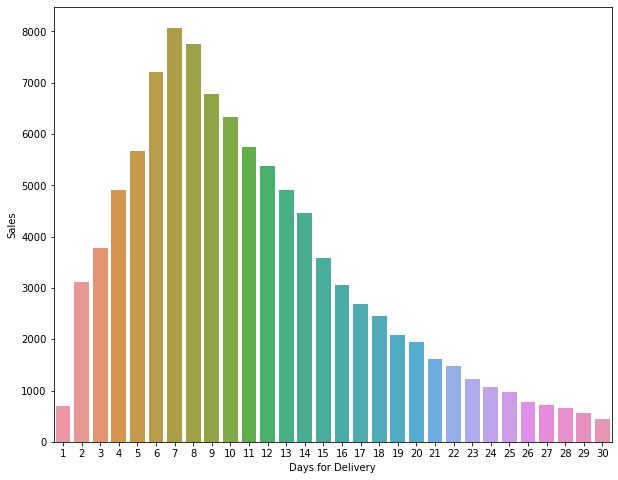

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(x=days_sales['Days for Delivery'],y=days_sales['Sales'])

From the above plot, Most no of sales are happening when the average delivery days are around 7-8 days.

<AxesSubplot:xlabel='price', ylabel='Density'>

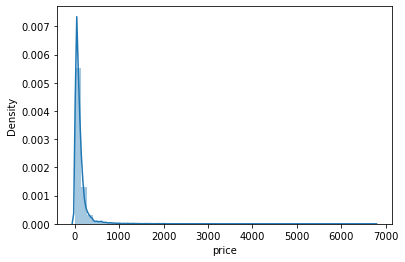

In [102]:
sns.distplot(order_orderitems_products_customers_merged['price'])

From the distplot, We can observe that most product price ranges from 0 to around 500

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

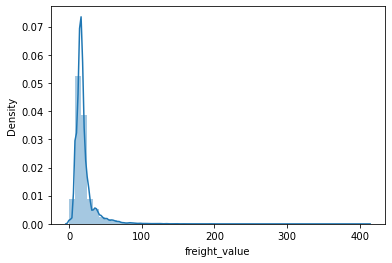

In [103]:
sns.distplot(order_orderitems_products_customers_merged['freight_value'])

From the distplot, We can observe that most product price ranges from 0 to around 50

# Customer Segmentation

In [104]:
order_orderitems_products_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101198 entries, 0 to 102092
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   order_id                        101198 non-null  object        
 1   customer_id                     101198 non-null  object        
 2   order_status                    101198 non-null  object        
 3   order_purchase_timestamp        101198 non-null  datetime64[ns]
 4   order_delivered_carrier_date    101198 non-null  datetime64[ns]
 5   order_delivered_customer_date   101198 non-null  datetime64[ns]
 6   order_estimated_delivery_date   101198 non-null  datetime64[ns]
 7   product_id                      101198 non-null  object        
 8   order_item_id                   101198 non-null  int64         
 9   seller_id                       101198 non-null  object        
 10  price                           101198 non-null  float64

In [105]:
df_copy=order_orderitems_products_customers_merged[['customer_unique_id',
    'order_id',
    'order_status',
    'order_purchase_Date',
    'product_id',
    'order_item_id',
    'price',
    'product_category_name']]

In [106]:
df_copy.rename(columns={'order_item_id':'quantity'},inplace=True)

In [107]:
df_copy['order_status'].value_counts()

delivered     99911
shipped         673
canceled        229
processing      201
invoiced        182
approved          2
Name: order_status, dtype: int64

In [108]:
df_copy=df_copy[df_copy['order_status']=='delivered']

In [109]:
df_copy.head()

customer_unique_id                          order_id  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  3a51803cc0d012c3b5dc8b7528cb05f7  128e10d95713541c87cd1a2e48201934   
2  ef0996a1a279c26e7ecbd737be23d235  0e7e841ddf8f8f2de2bad69267ecfbcf   
3  e781fdcc107d13d865fc7698711cc572  bfc39df4f36c3693ff3b63fcbea9e90a   
4  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   

  order_status order_purchase_Date                        product_id  \
0    delivered          2017-10-02  87285b34884572647811a353c7ac498a   
1    delivered          2017-08-15  87285b34884572647811a353c7ac498a   
2    delivered          2017-08-02  87285b34884572647811a353c7ac498a   
3    delivered          2017-10-23  87285b34884572647811a353c7ac498a   
4    delivered          2018-07-24  595fac2a385ac33a80bd5114aec74eb8   

   quantity   price product_category_name  
0         1   29.99            housewares  
1         1   29.99            housewares  
2         1   29.99            housewares  
3         1   29.99            housewares  
4         1  118.70             perfumery

In [110]:
# Setting the reference day
df_copy['today']=df_copy['order_purchase_Date'].max()

# Calculating the recency
df_copy['recency']=df_copy['today']-df_copy['order_purchase_Date']

In [111]:
# Calculating the total price of orders
df_copy['total_price']=df_copy['quantity']*df_copy['price']

In [112]:
customer_segment=df_copy.groupby(by=['customer_unique_id','order_id'],as_index=False).agg({'order_purchase_Date':'first',
                                                                         'quantity':'sum',
                                                                         'total_price':'sum',
                                                                         'today':'first',
                                                                         'recency':'first'})

In [113]:
# Changing recency datatype as integer
customer_segment['recency']=customer_segment['recency'].dt.days

In [114]:
df_customer_segment=customer_segment.groupby(by='customer_unique_id',as_index=False).agg({'recency':['min','max','count'],
                                                                     'total_price':['sum','mean']})

In [115]:
df_customer_segment.columns=[' '.join(i).strip()   for i in df_customer_segment.columns.values]

In [116]:
df_customer_segment.rename(columns={'recency max': 'days_since_first_order',
    'recency min': 'recency',
    'recency count': 'frequency',
    'total_price sum': 'total payment',
    'total_price mean': 'avg payment'},inplace=True)

In [117]:
model_build_var=df_customer_segment[['recency','frequency','total payment']]
model_build_var_withoutscale=df_customer_segment[['recency','frequency','total payment']]

<AxesSubplot:xlabel='recency', ylabel='Density'>

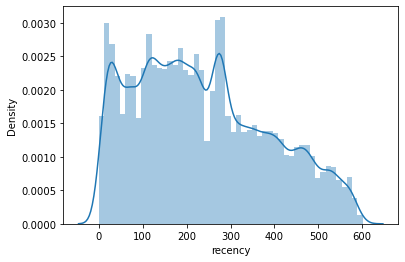

In [118]:
sns.distplot(df_customer_segment['recency'])

<AxesSubplot:xlabel='frequency'>

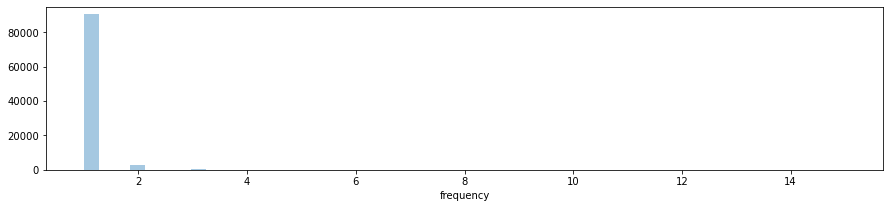

In [119]:
plt.figure(figsize=(15,3))
sns.distplot(df_customer_segment['frequency'],kde=False)


<AxesSubplot:xlabel='recency'>

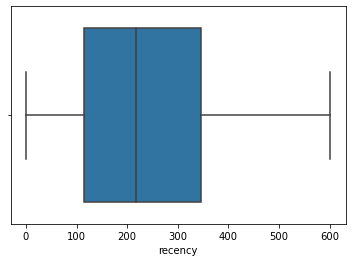

In [120]:
sns.boxplot(model_build_var_withoutscale['recency'])

In [121]:
ss=StandardScaler()
model_build_var.loc[:,:]=ss.fit_transform(model_build_var)
model_build_var.head()

recency  frequency  total payment
0 -0.829732  -0.159666      -0.054089
1 -0.809857  -0.159666      -0.568546
2  1.992503  -0.159666      -0.336345
3  0.561511  -0.159666      -0.535685
4  0.342887  -0.159666       0.178111

In [122]:
# We will be performing a statistical test to check whether recency frequency total payment has any relationship.

In [123]:
#Null: Correlation coefficient is  significantly equal to zero.
#Alternate: Correlation coefficient is not significantly equal to zero.

In [124]:
stats.pearsonr(model_build_var_withoutscale['recency'],model_build_var_withoutscale['frequency'])

(-0.021796639202701938, 2.904065729544129e-11)

In [125]:
# Since pvalue is less than 0.05. We reject NULL.So there is slight relation between recency and frequency.

In [126]:
stats.pearsonr(model_build_var_withoutscale['frequency'],model_build_var_withoutscale['total payment'])

(0.1057993082724789, 6.748330528195386e-230)

In [127]:
# Since pvalue is less than 0.05. We reject NULL.So there is slight relation between frequency and total payment.

In [128]:
stats.pearsonr(model_build_var_withoutscale['recency'],model_build_var_withoutscale['total payment'])

(-0.0008942426241804009, 0.7849682789030443)

In [129]:
# Since pvalue is greater than 0.05. We failed to reject NULL.So there is no relation between recency and total payment.

In [130]:
wcss=[]

for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(model_build_var)
    wcss.append(kmeans.inertia_)
wcss

[201458.30465649045,
 137368.9528919505,
 91477.2440042515,
 76865.08971466008,
 62845.24345530136,
 53423.589720525386,
 47706.70459113505,
 43436.99807902035]

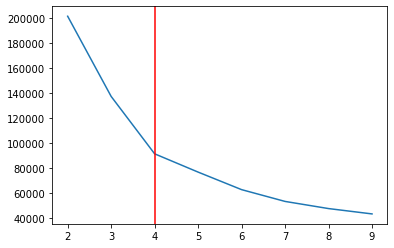

In [131]:
plt.plot(range(2,10),wcss)
plt.axvline(x=4,color='red')
plt.show()

From the Elbow Plot, we Observe that the inertia is minimum at k=4 , therefore the min no of clusters is 4

In [132]:
kmeans=KMeans(n_clusters=4,random_state=10)
kmeans.fit(model_build_var)

KMeans(n_clusters=4, random_state=10)

In [133]:
model_build_var_withoutscale['cluster']=kmeans.labels_

In [134]:
model_build_var_withoutscale.head()

recency  frequency  total payment  cluster
0      111          1         129.90        0
1      114          1          18.90        0
2      537          1          69.00        1
3      321          1          25.99        1
4      288          1         180.00        1

In [135]:
model_describe=model_build_var_withoutscale.groupby(by='cluster',as_index=False).agg({'recency': 'mean',
    'frequency': 'mean',
    'total payment': ['mean', 'count']}).round(2)

In [136]:
model_describe.columns.map(lambda x: '|'.join([str(i) for i in x]))

Index(['cluster|', 'recency|mean', 'frequency|mean', 'total payment|mean',
       'total payment|count'],
      dtype='object')

In [137]:
model_describe.columns=model_describe.columns.map(lambda x: '|'.join([str(i) for i in x]))

In [138]:
model_describe

cluster|  recency|mean  frequency|mean  total payment|mean  \
0         0        127.10            1.00              113.37   
1         1        384.19            1.00              113.98   
2         2        219.23            2.11              243.11   
3         3        235.77            1.01             1143.68   

   total payment|count  
0                50546  
1                37614  
2                 2762  
3                 2178

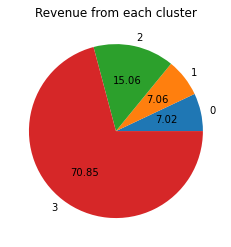

In [139]:
plt.pie(model_describe['total payment|mean'],autopct='%.2f',labels=model_describe['cluster|'],radius=1)
plt.title('Revenue from each cluster')
plt.show()

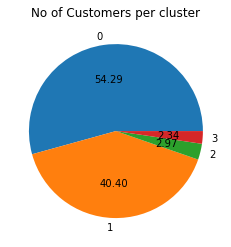

In [140]:
plt.pie(model_describe['total payment|count'],labels=model_describe['cluster|'],autopct='%.2f')
plt.title('No of Customers per cluster')
plt.show()

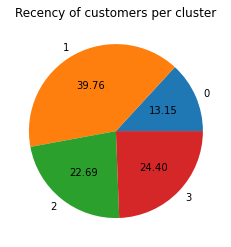

In [141]:
plt.pie(x=model_describe['recency|mean'],labels=model_describe['cluster|'],autopct='%.2f')
plt.title('Recency of customers per cluster')
plt.show()

In [142]:
model_describe['customers_type']=model_describe['cluster|'].map({0:'New Low-Spenders',1:'Hibernating Low-Spenders',2:'Loyal Customers',3:'Big Spenders'})

In [143]:
model_describe

cluster|  recency|mean  frequency|mean  total payment|mean  \
0         0        127.10            1.00              113.37   
1         1        384.19            1.00              113.98   
2         2        219.23            2.11              243.11   
3         3        235.77            1.01             1143.68   

   total payment|count            customers_type  
0                50546          New Low-Spenders  
1                37614  Hibernating Low-Spenders  
2                 2762           Loyal Customers  
3                 2178              Big Spenders

In [144]:
ord_delivered=order_orderitems_products_customers_merged_full[order_orderitems_products_customers_merged_full['order_status']=='delivered']

In [192]:
model_describe[['cluster|','customers_type']]

cluster|            customers_type
0         0          New Low-Spenders
1         1  Hibernating Low-Spenders
2         2           Loyal Customers
3         3              Big Spenders

### RFM Analysis

In [145]:
# finding the time range of the data given.
time_range=str((ord_delivered['order_purchase_timestamp'].max()-ord_delivered['order_purchase_timestamp'].min()))

In [146]:
# Dividing the time range into 4 periods, since we have 4 clusters
period_days=int(re.sub(r'\s+days.*', '',time_range))/4

In [147]:
df_customer_segment

customer_unique_id  recency  days_since_first_order  \
0      0000366f3b9a7992bf8c76cfdf3221e2      111                     111   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      114                     114   
2      0000f46a3911fa3c0805444483337064      537                     537   
3      0000f6ccb0745a6a4b88665a16c9f078      321                     321   
4      0004aac84e0df4da2b147fca70cf8255      288                     288   
...                                 ...      ...                     ...   
93095  fffcf5a5ff07b0908bd4e2dbc735a684      447                     447   
93096  fffea47cd6d3cc0a88bd621562a9d061      262                     262   
93097  ffff371b4d645b6ecea244b27531430a      568                     568   
93098  ffff5962728ec6157033ef9805bacc48      119                     119   
93099  ffffd2657e2aad2907e67c3e9daecbeb      484                     484   

       frequency  total payment  avg payment  
0              1         129.90       129.90  
1              1          18.90        18.90  
2              1          69.00        69.00  
3              1          25.99        25.99  
4              1         180.00       180.00  
...          ...            ...          ...  
93095          1        1570.00      1570.00  
93096          1          64.89        64.89  
93097          1          89.90        89.90  
93098          1         115.00       115.00  
93099          1          56.99        56.99  

[93100 rows x 6 columns]

In [148]:
#segmenting customers based on recency period
def seg_cust(rec):
    if rec<=period_days:
        return 'active'
    elif ((rec>period_days) & (rec<=(period_days*2))):
        return 'hot'
    elif ((rec>(period_days*2)) & (rec<=(period_days*3))):
        return 'active'
    elif (rec>(period_days*3)):
        return 'inactive'

In [149]:
df_customer_segment['customer_type']=df_customer_segment['recency'].map(seg_cust)

In [150]:
df_customer_segment['customer_type'].value_counts()

active      56266
hot         33691
inactive     3143
Name: customer_type, dtype: int64

In [151]:
# Getting the average payment median.
median_payment=df_customer_segment['avg payment'].median()

In [152]:
# Dividing into sub classes based on the avg payment.
class_inactive_low = df_customer_segment['customer_type'] == 'inactive'
class_cold_low = (df_customer_segment['customer_type'] == 'cold')\
    & (df_customer_segment['avg payment'] < median_payment)
class_cold_high = (df_customer_segment['customer_type'] == 'cold')\
    & (df_customer_segment['avg payment'] >= median_payment)
class_hot_low = (df_customer_segment['customer_type'] == 'hot')\
    & (df_customer_segment['avg payment'] < median_payment)
class_hot_high = (df_customer_segment['customer_type'] == 'hot')\
    & (df_customer_segment['avg payment'] >= median_payment)
class_active_low = (df_customer_segment['customer_type'] == 'active')\
    & (df_customer_segment['avg payment'] < median_payment)
class_active_high = (df_customer_segment['customer_type'] == 'active')\
    & (df_customer_segment['avg payment'] >= median_payment)

In [153]:
# Adding sub labels to the dataframe
df_customer_segment.loc[class_inactive_low, "sub_segment"] = "inactive"
df_customer_segment.loc[class_cold_low, "sub_segment"] = "cold_low"
df_customer_segment.loc[class_cold_high, "sub_segment"] = "cold_high"
df_customer_segment.loc[class_hot_low, "sub_segment"] = "hot_low"
df_customer_segment.loc[class_hot_high, "sub_segment"] = "hot_high"
df_customer_segment.loc[class_active_low, "sub_segment"] = "active_low"
df_customer_segment.loc[class_active_high, "sub_segment"] = "active_high"

In [154]:
def plot_waffle_chart(dat, metric, agg, title_txt, group='sub_segment'):
    
    '''Funtion to create a waffle chart. The visualization shows how the customer sub-segments are distributed 
        according defined metrics.
        Input:
        - dat - dataframe
        - metric - feature/ kpi metric to visualize
        - agg - method to aggregate
        - title_txt - text to display as chart title
        Output:
        - waffle chart'''
    data_revenue = dict(round(dat.groupby(group).agg({metric: agg}))[metric])
    plt.figure(FigureClass=Waffle,rows=5,columns=10,values=data_revenue,labels=[f"{k, v}" for k, v in data_revenue.items()],
            legend={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
            figsize=(8, 5)
            )

    plt.title(title_txt)

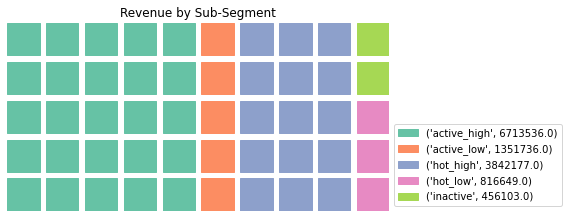

In [155]:
# plotting the waffle chart based on revenue by each sub segment.
plot_waffle_chart(df_customer_segment,'total payment','sum','Revenue by Sub-Segment')

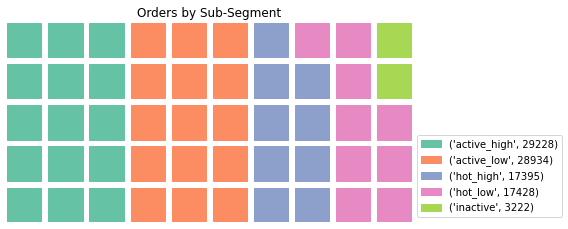

In [156]:
# plot for no of orders in each sub segment.
plot_waffle_chart(df_customer_segment, 'frequency', 'sum', 'Orders by Sub-Segment')

In [157]:
# From the above waffle chart, it is observed that active high customers are spending more, followed by hot_high customers.
# Active Customers are the highest group , followed by hot customers
# Active Customers are also the group with highest orders.
# Inactive customer proportion is also very less.

In [158]:
# function for frequency score assign
def assign_frequency(x):    
    if x >= 7:
        return 4
    elif x >= 4:
        return 3
    elif x >= 2:
        return 2
    else:
        return 1

In [159]:
# calculating R,F,M scores 
df_customer_segment['R']=pd.qcut(df_customer_segment['recency'],q=4,labels=range(4,0,-1))
df_customer_segment['F']=df_customer_segment['frequency'].apply(assign_frequency)
df_customer_segment['M']=pd.qcut(df_customer_segment['total payment'],q=4,labels=range(1,5))

In [160]:
df_customer_segment.head()

customer_unique_id  recency  days_since_first_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111                     111   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114                     114   
2  0000f46a3911fa3c0805444483337064      537                     537   
3  0000f6ccb0745a6a4b88665a16c9f078      321                     321   
4  0004aac84e0df4da2b147fca70cf8255      288                     288   

   frequency  total payment  avg payment customer_type  sub_segment  R  F  M  
0          1         129.90       129.90        active  active_high  4  1  3  
1          1          18.90        18.90        active   active_low  4  1  1  
2          1          69.00        69.00      inactive     inactive  1  1  2  
3          1          25.99        25.99           hot      hot_low  2  1  1  
4          1         180.00       180.00           hot     hot_high  2  1  4

In [161]:
# Getting the customer segment and also rfm score
df_customer_segment['segment_RFM']=df_customer_segment['R'].astype(str)+df_customer_segment['F'].astype(str)\
+df_customer_segment['M'].astype(str)
df_customer_segment['score_rfm'] =df_customer_segment[['R','F','M']].sum(axis=1) 

In [162]:
df_customer_segment.head()

customer_unique_id  recency  days_since_first_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111                     111   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114                     114   
2  0000f46a3911fa3c0805444483337064      537                     537   
3  0000f6ccb0745a6a4b88665a16c9f078      321                     321   
4  0004aac84e0df4da2b147fca70cf8255      288                     288   

   frequency  total payment  avg payment customer_type  sub_segment  R  F  M  \
0          1         129.90       129.90        active  active_high  4  1  3   
1          1          18.90        18.90        active   active_low  4  1  1   
2          1          69.00        69.00      inactive     inactive  1  1  2   
3          1          25.99        25.99           hot      hot_low  2  1  1   
4          1         180.00       180.00           hot     hot_high  2  1  4   

  segment_RFM  score_rfm  
0         413          8  
1         411          6  
2         112          4  
3         211          4  
4         214          7

In [163]:
# Grouping customers based on rfm score.
def rfm_type_assign(df):
    if (int(df['segment_RFM']) >= 434) or (df['score_rfm'] >= 9):
        return 'Best customer'
    elif (df['score_rfm'] >= 8) and (df['M'] == 4):
        return 'Big Spender'
    elif (df['score_rfm'] >= 6) and (df['F'] >= 2):
        return 'Loyalist'
    elif (int(df['segment_RFM']) >= 231) or (df['score_rfm'] >= 6):
        return 'Potential Loyalists'
    elif ((int(df['segment_RFM']) >= 121) and (df['R'] == 1)) or df['score_rfm'] == 5:
        return 'Almost Lost'
    elif (df['score_rfm'] >= 4) and (df['R'] == 1):
        return 'Hibernating'
    else:
        return 'Lost Customer'

In [164]:
df_customer_segment['customer_rfm_segment']=df_customer_segment.apply(rfm_type_assign,axis=1)

In [165]:
dict_strategy={'Best customer': 'Personalized communication, offer loyalty program, no promotional offers needed',
               'Big Spender': 'Make them feel valued and offer quality products, encourage to stick with brands', 
               'Loyalist': 'Offer loyalty program', 
               'Potential Loyalists': 'Recommend products and offer discounts', 
               'Almost Lost': 'Try to win them with limited sales promotions', 
               'Hibernating': 'Make great offers with big discounts', 
               'Lost Customer': 'Do not spent much effort and money to win them'}

In [166]:
df_customer_segment['business strategy']=df_customer_segment['customer_rfm_segment'].apply(lambda x:dict_strategy[x])

In [167]:
df_customer_segment.head()

customer_unique_id  recency  days_since_first_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111                     111   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114                     114   
2  0000f46a3911fa3c0805444483337064      537                     537   
3  0000f6ccb0745a6a4b88665a16c9f078      321                     321   
4  0004aac84e0df4da2b147fca70cf8255      288                     288   

   frequency  total payment  avg payment customer_type  sub_segment  R  F  M  \
0          1         129.90       129.90        active  active_high  4  1  3   
1          1          18.90        18.90        active   active_low  4  1  1   
2          1          69.00        69.00      inactive     inactive  1  1  2   
3          1          25.99        25.99           hot      hot_low  2  1  1   
4          1         180.00       180.00           hot     hot_high  2  1  4   

  segment_RFM  score_rfm customer_rfm_segment  \
0         413          8  Potential Loyalists   
1         411          6  Potential Loyalists   
2         112          4          Hibernating   
3         211          4        Lost Customer   
4         214          7  Potential Loyalists   

                                business strategy  
0          Recommend products and offer discounts  
1          Recommend products and offer discounts  
2            Make great offers with big discounts  
3  Do not spent much effort and money to win them  
4          Recommend products and offer discounts

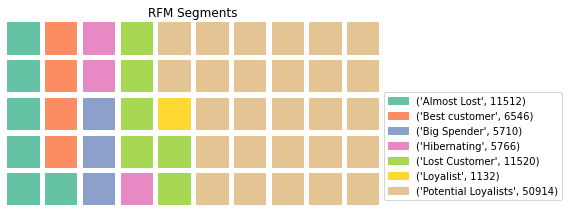

In [168]:

plot_waffle_chart(df_customer_segment,'customer_unique_id','count','RFM Segments','customer_rfm_segment')

In [169]:
segment_grp=df_customer_segment.groupby('customer_rfm_segment').agg(
    Count = ('customer_unique_id', 'count'),
    Recency = ('recency', 'mean'),
    Frequency = ('frequency', 'mean'),
    Monetary = ('total payment', 'mean'),
    Strategy = ('business strategy', 'unique'),
).round(1)

In [170]:
segment_grp

Count  Recency  Frequency  Monetary  \
customer_rfm_segment                                        
Almost Lost           11512    359.1        1.0      88.7   
Best customer          6546     66.5        1.2     356.5   
Big Spender            5710    172.7        1.1     346.1   
Hibernating            5766    443.0        1.0      64.8   
Lost Customer         11520    366.1        1.0      29.0   
Loyalist               1132    289.6        2.1     174.5   
Potential Loyalists   50914    183.4        1.0     136.4   

                                                               Strategy  
customer_rfm_segment                                                     
Almost Lost             [Try to win them with limited sales promotions]  
Best customer         [Personalized communication, offer loyalty pro...  
Big Spender           [Make them feel valued and offer quality produ...  
Hibernating                      [Make great offers with big discounts]  
Lost Customer          [Do not spent much effort and money to win them]  
Loyalist                                        [Offer loyalty program]  
Potential Loyalists            [Recommend products and offer discounts]

In [171]:
segment_grp.to_csv('final result.csv')

In [172]:
# From the above table, it is observed that we have around 50914 customers who are potential based on the rfm analysis, SO for 
# those people the company should recommend products and offer them discounts so that they can increase their sales.
# Now for 11520 who are lost because their recency is more than an year, don't spend much money on them since they are already 
# lost.

In [173]:
# Also there are customers who are hibernating and almost lost customers where we can provide offers and discounts for them.

### Sales Prediction

In [174]:
monthlysales_count

Year  purchase_month  count
0   2017               1    813
1   2017               2   1741
2   2017               3   2674
3   2017               4   2402
4   2017               5   3716
5   2017               6   3275
6   2017               7   4078
7   2017               8   4396
8   2017               9   4330
9   2017              10   4708
10  2017              11   7667
11  2017              12   5686
12  2018               1   7331
13  2018               2   6763
14  2018               3   7289
15  2018               4   7157
16  2018               5   7079
17  2018               6   6382
18  2018               7   6449
19  2018               8   6698
20  2018               9      1

In [175]:
linmodel=monthlysales_count.drop(index=20)

In [176]:
linmodel[['Year','purchase_month']]=linmodel[['Year','purchase_month']].astype(str)

In [177]:
linmodel_cat=linmodel.select_dtypes(include=object)

In [178]:
independent_var=pd.get_dummies(linmodel_cat,drop_first=True)
dependent_var=linmodel['count']

In [179]:
independent_var_const=sm.add_constant(independent_var)

In [180]:
xtrain,xtest,ytrain,ytest=train_test_split(independent_var_const,dependent_var,random_state=10,test_size=0.3)

In [181]:
line_reg=sm.OLS(ytrain,xtrain).fit()
line_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     7.192
Date:                Fri, 13 May 2022   Prob (F-statistic):             0.0656
Time:                        14:14:07   Log-Likelihood:                -104.62
No. Observations:                  14   AIC:                             231.2
Df Residuals:                       3   BIC:                             238.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1632.2500    727.060      2.245      0.110    -681.581    3946.081
Year_2018          4879.5000    650.303      7.503      0.005    2809.947    6949.053
purchase_month_10  3075.7500   1172.350      2.624      0.079    -655.190    6806.690
purchase_month_11  2.202e-13   4.32e-13      0.510      0.645   -1.15e-12    1.59e-12
purchase_month_12  4053.7500   1172.350      3.458      0.041     322.810    7784.690
purchase_month_2    180.0000    919.667      0.196      0.857   -2746.790    3106.790
purchase_month_3    909.5000    919.667      0.989      0.396   -2017.290    3836.290
purchase_month_4    645.2500   1172.350      0.550      0.620   -3085.690    4376.190
purchase_month_5   1325.5000    919.667      1.441      0.245   -1601.290    4252.290
purchase_month_6   -129.7500   1172.350     -0.111      0.919   -3860.690    3601.190
purchase_month_7  -5.985e-15   9.38e-15     -0.638      0.569   -3.58e-14    2.39e-14
purchase_month_8    186.2500   1172.350      0.159      0.884   -3544.690    3917.190
purchase_month_9   2697.7500   1172.350      2.301      0.105   -1033.190    6428.690
==============================================================================
Omnibus:                        1.249   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.092
Skew:                          -0.000   Prob(JB):                        0.955
Kurtosis:                       3.398   Cond. No.                     1.91e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.38e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [182]:
# The above model can be used to predict the monthly sales of the company.

In [191]:
px.scatter_3d(data_frame=model_build_var_withoutscale,x='frequency',y='recency',z='total payment',color='cluster')